# <center> Imarticus Data Science Hackathon - November 2021

### The objective of the problem:

Ampire is an emerging sticker company that is trying hard to replace marble and tiles for floors and walls in India

Ampire is trying hard to find the value or deal size in rupees based on the sticker type and dealer in different states in India

Data Dictionary:-
1. Item Code – Unique item number
2. State – State customer belongs to
3. Date – Date of billing
4. Month – Month of billing
5. Item Description – Product information
6. ERP Size – Dimenision of sticker sheet
7. Wall/Floor – suitable for wall or floor
8. Sticker Body Type – Design element of the sticker
9. <font color=red>Value – Purchase made by the customer for given sticker in Rupees</font>
10. Item Classification – Sticker type
11. Item Cat. Code – Sticker Category code
12. Quality Code – Sticker Quality code
13. Customer code – Unique Customer code
14. Customer city – City in which customer is residing
15. Customer type – Customer type based on sales
16. Sales Type – Classification of sale based on purchase
17. MRP / box – Price of sticker per box
18. MRP / sqm – Price of sticker per square metre
19. AD1/sqm – Additional Discount 1 per square metre
20. AD2/sqm - Additional Discount 2 per square metre
21. AD3/sqm - Additional Discount 3 per square metre
22. AD4/sqm - Additional Discount 4 per square metre
23. AD5/sqm - Additional Discount 5 per square metre
24. AD6/sqm - Additional Discount 6 per square metre
25. AD7/sqm - Additional Discount 7 per square metre
26. Total AD /sqm – Total additional discount per square metre
27. Billing rate/sqm – Billing rate for the customer(dealer or distributor)
28. Buyer Rate/sqm – Rate for cutomer who will be using the stickers
29. Ship to city – Shiping city
30. FY – Financial year
31. Category – Materialistic Category
32. Review zone – Zone
33. Category 2 – Sticker type category
34. Re territory – Related territory

Evaluation Algorithm
Root Mean Square Error (RMSE)
normalization_constant 10000



In [105]:
import os 
import pandas as pd
import numpy as np
from __future__ import division
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

from datetime import datetime, timedelta,date

In [106]:
os.chdir(r"D:\Imarticus\Extra Practice\Hackathon\Imarticus\For model")
train = pd.read_csv("TRAINING.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (9,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.



In [107]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            17472 non-null  object 
 1   State                17472 non-null  object 
 2   Date                 17472 non-null  object 
 3   Month                17472 non-null  object 
 4   Item Description     17472 non-null  object 
 5   ERP Size             17472 non-null  object 
 6   Wall / Floor         17472 non-null  object 
 7   Sticker Body Type    17472 non-null  object 
 8   Item Classification  17472 non-null  object 
 9   Value                17472 non-null  object 
 10  Item Cat. Code       17472 non-null  object 
 11  Quality Code         17472 non-null  object 
 12  Customer Code        17472 non-null  object 
 13  Customer City        17472 non-null  object 
 14  Customer Type        17472 non-null  object 
 15  Sales Type           17472 non-null 

In [109]:
train.head()

,Item Code,State,Date,Month,Item Description,ERP Size,Wall / Floor,Sticker Body Type,Item Classification,Value,...,AD7/Sqm,Total AD/Sqm,Billing Rate/Sqm,Buyer Rate/Sqm,Ship+AC0-to City,FY,Category,Review Zone,Category 2,Re Territory
0,C025506652701860361M,Assam,06-08-2018,#NAME?,18+ACI-,600X600 PGVT Botticino Classico 4 Pcs Prem,600X600,Floor,Vitrified,174096,...,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
1,C025506661491859361M,Assam,06-08-2018,#NAME?,18+ACI-,600X600 PGVT Carara Elegance 4 Pcs Prem,600X600,Floor,Vitrified,174096,...,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
2,C025506665870335361M,Assam,06-08-2018,#NAME?,18+ACI-,600X600 PGVT Hamley Grey 4 Pcs Prem,600X600,Floor,Vitrified,174096,...,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
3,C025506652720553361M,Assam,06-08-2018,#NAME?,18+ACI-,600X600 PGVT Onyx Verde 4 Pcs Prem,600X600,Floor,Vitrified,162489.6,...,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
4,C025506661491859361M,Bihar,06-08-2018,#NAME?,18+ACI-,600X600 PGVT Carara Elegance 4 Pcs Prem,600X600,Floor,Vitrified,97493.76,...,0,35,403.0,438.0,Samastipur,2018+AC0-19,HVP,East,GVT,PATNA


## Data Preparation & Cleaning

In [110]:
train.shape

(17472, 34)

In [111]:
train.replace('#NAME?',np.nan,inplace=True)

train.drop(['Month','Date'],axis=1,inplace=True)

In [112]:
train['Ship+AC0-to City'].fillna(train['Ship+AC0-to City'].mode()[0],inplace=True)

In [113]:
avg=train['Value'].astype('float').mean(axis=0)
avg

train['Value'].replace(np.nan,avg,inplace=True)

In [114]:
avg1=train['AD4/Sqm'].astype('float').mean(axis=0)
train['AD4/Sqm'].replace(np.nan,avg1,inplace=True)

In [115]:
avg2=train['AD5/Sqm'].astype('float').mean(axis=0)
train['AD5/Sqm'].replace(np.nan,avg2,inplace=True)

In [116]:
avg3=train['AD6/Sqm'].astype('float').mean(axis=0)
train['AD6/Sqm'].replace(np.nan,avg3,inplace=True)

In [117]:
train['AD7/Sqm'].replace('SIPL/1819/06179',np.nan,inplace=True)
train['AD7/Sqm'].replace('SIPL/1819/06347',np.nan,inplace=True)
train['AD7/Sqm'].replace('SIPLEXS18/0091',np.nan,inplace=True)

In [118]:
avg4=train['AD7/Sqm'].astype('float').mean(axis=0)

train['AD7/Sqm'].replace(np.nan,avg4,inplace=True)

In [119]:
avg5=train['Billing Rate/Sqm'].astype('float').mean(axis=0)
avg5

train['Billing Rate/Sqm'].replace(np.nan,avg5,inplace=True)

In [120]:
avg6=train['Buyer Rate/Sqm'].astype('float').mean(axis=0)
avg6

train['Buyer Rate/Sqm'].replace(np.nan,avg6,inplace=True)

In [121]:
train['AD5/Sqm']=train['AD5/Sqm'].astype('float')
train['AD6/Sqm']=train['AD5/Sqm'].astype('float')
train['AD7/Sqm']=train['AD5/Sqm'].astype('float')
train['Value']=train['Value'].astype('float')

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            17472 non-null  object 
 1   State                17472 non-null  object 
 2   Item Description     17472 non-null  object 
 3   ERP Size             17472 non-null  object 
 4   Wall / Floor         17472 non-null  object 
 5   Sticker Body Type    17472 non-null  object 
 6   Item Classification  17472 non-null  object 
 7   Value                17472 non-null  float64
 8   Item Cat. Code       17472 non-null  object 
 9   Quality Code         17472 non-null  object 
 10  Customer Code        17472 non-null  object 
 11  Customer City        17472 non-null  object 
 12  Customer Type        17472 non-null  object 
 13  Sales Type           17472 non-null  object 
 14  MRP /BOX             17472 non-null  int64  
 15  MRP /Sqm             17472 non-null 

In [123]:
train.isnull().sum()

Item Code              0
State                  0
Item Description       0
ERP Size               0
Wall / Floor           0
Sticker Body Type      0
Item Classification    0
Value                  0
Item Cat. Code         0
Quality Code           0
Customer Code          0
Customer City          0
Customer Type          0
Sales Type             0
MRP /BOX               0
MRP /Sqm               0
AD1 /Sqm               0
AD2/Sqm                0
AD3/Sqm                0
AD4/Sqm                0
AD5/Sqm                0
AD6/Sqm                0
AD7/Sqm                0
Total AD/Sqm           0
Billing Rate/Sqm       0
Buyer Rate/Sqm         0
Ship+AC0-to City       0
FY                     0
Category               0
Review Zone            0
Category 2             0
Re Territory           0
dtype: int64

### Label Encoder

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
train_cat=train.select_dtypes(include='object').columns 
train_cat

Index(['Item Code', 'State', 'Item Description', 'ERP Size', 'Wall / Floor',
       'Sticker Body Type', 'Item Classification', 'Item Cat. Code',
       'Quality Code', 'Customer Code', 'Customer City', 'Customer Type',
       'Sales Type', 'Total AD/Sqm', 'Ship+AC0-to City', 'FY', 'Category',
       'Review Zone', 'Category 2', 'Re Territory'],
      dtype='object')

In [126]:
for c in train_cat:
        lbl=LabelEncoder()
        lbl.fit(list(train[c].values))
        train[c]=lbl.transform(list(train[c].values))

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            17472 non-null  int32  
 1   State                17472 non-null  int32  
 2   Item Description     17472 non-null  int32  
 3   ERP Size             17472 non-null  int32  
 4   Wall / Floor         17472 non-null  int32  
 5   Sticker Body Type    17472 non-null  int32  
 6   Item Classification  17472 non-null  int32  
 7   Value                17472 non-null  float64
 8   Item Cat. Code       17472 non-null  int32  
 9   Quality Code         17472 non-null  int32  
 10  Customer Code        17472 non-null  int32  
 11  Customer City        17472 non-null  int32  
 12  Customer Type        17472 non-null  int32  
 13  Sales Type           17472 non-null  int32  
 14  MRP /BOX             17472 non-null  int64  
 15  MRP /Sqm             17472 non-null 

In [128]:
train.head()

,Item Code,State,Item Description,ERP Size,Wall / Floor,Sticker Body Type,Item Classification,Value,Item Cat. Code,Quality Code,...,AD7/Sqm,Total AD/Sqm,Billing Rate/Sqm,Buyer Rate/Sqm,Ship+AC0-to City,FY,Category,Review Zone,Category 2,Re Territory
0,391,3,0,438,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
1,394,3,0,439,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
2,396,3,0,447,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
3,392,3,0,453,7,0,1,162489.60,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
4,394,4,0,439,7,0,1,97493.76,4,0,...,0.0,36,403.0,438.0,264,0,0,1,2,26


In [129]:
train.Value.value_counts()

7020.00      472
10530.00     300
14040.00     292
6168.96      267
17550.00     263
            ... 
21471.84       1
6994.80        1
44683.20       1
16829.28       1
179020.80      1
Name: Value, Length: 2568, dtype: int64

### Test Data

In [130]:
test = pd.read_csv("TEST.csv")

In [131]:
test.head()

,Item Code,State,Date,Month,Item Description,ERP Size,Wall / Floor,Sticker Body Type,Item Classification,Item Cat. Code,...,Billing Rate/Sqm,Buyer Rate/Sqm,Ship+AC0-to City,FY,Category,Review Zone,Category 2,Re Territory,Unnamed: 33,Unnamed: 34
0,C015005764401033011M,Uttar Pradesh,26-02-2019,#NAME?,19+ACI-,300X600 ODM Babylon Brown Dk 6 Pcs Prem,300X600,Wall,Ceramic,S0570502+AF8-1,...,325.0,360,Sikandrabad,2018+AC0-19,HVP,NC,Ceramic,NOIDA,NaN,NaN
1,C015005764401034011M,Uttar Pradesh,26-02-2019,#NAME?,19+ACI-,300X600 ODM Babylon Brown Lt 6 Pcs Prem,300X600,Wall,Ceramic,S0570501+AF8-1,...,325.0,360,Sikandrabad,2018+AC0-19,HVP,NC,Ceramic,NOIDA,NaN,NaN
2,C015005664260249011M,Uttarakhand,26-02-2019,#NAME?,19+ACI-,300X450 ODG Emilia Brown 6 Pcs Prem,300X450,Wall,Ceramic,S0560501+AF8-1,...,252.0,282,Dehradun,2018+AC0-19,Non HVP,NC,Ceramic,DEHRADUN,NaN,NaN
3,C015005664281343011M,Uttarakhand,26-02-2019,#NAME?,19+ACI-,300X450 ODH Emilia Hl 6 Pcs Prem,300X450,Wall,Ceramic,S0560502+AF8-1,...,252.0,282,Dehradun,2018+AC0-19,Non HVP,NC,Ceramic,DEHRADUN,NaN,NaN
4,C015005765101031011M,Uttarakhand,26-02-2019,#NAME?,19+ACI-,300X600 ODG Hexagon Beige Lt 6 Pcs Prem,300X600,Wall,Ceramic,S0570501+AF8-1,...,330.0,360,Dehradun,2018+AC0-19,HVP,NC,Ceramic,DEHRADUN,NaN,NaN


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            4048 non-null   object 
 1   State                4048 non-null   object 
 2   Date                 4048 non-null   object 
 3   Month                4048 non-null   object 
 4   Item Description     4048 non-null   object 
 5   ERP Size             4048 non-null   object 
 6   Wall / Floor         4048 non-null   object 
 7   Sticker Body Type    4048 non-null   object 
 8   Item Classification  4048 non-null   object 
 9   Item Cat. Code       4048 non-null   object 
 10  Quality Code         4048 non-null   object 
 11  Customer Code        4048 non-null   object 
 12  Customer City        4048 non-null   object 
 13  Customer Type        4048 non-null   object 
 14  Sales Type           4048 non-null   object 
 15  MRP /BOX             4048 non-null   o

In [133]:
test.replace('#NAME?',np.nan,inplace=True)

test.drop(['Month','Date','Unnamed: 33','Unnamed: 34'],axis=1,inplace=True)

In [134]:
test['Ship+AC0-to City'].fillna(test['Ship+AC0-to City'].mode()[0],inplace=True)
test['Customer City'].fillna(test['Customer City'].mode()[0],inplace=True)
test['FY'].fillna(test['FY'].mode()[0],inplace=True)

In [135]:
avg1=test['AD4/Sqm'].astype('float').mean(axis=0)
test['AD4/Sqm'].replace(np.nan,avg1,inplace=True)

In [136]:
avg2=test['AD5/Sqm'].astype('float').mean(axis=0)
test['AD5/Sqm'].replace(np.nan,avg2,inplace=True)

In [137]:
avg3=test['AD6/Sqm'].astype('float').mean(axis=0)
test['AD6/Sqm'].replace(np.nan,avg3,inplace=True)

In [138]:
test['AD7/Sqm'].replace('SIPL/1819/06179',np.nan,inplace=True)
test['AD7/Sqm'].replace('SIPL/1819/06347',np.nan,inplace=True)
test['AD7/Sqm'].replace('SIPLEXS18/0091',np.nan,inplace=True)

In [139]:
avg4=test['AD7/Sqm'].astype('float').mean(axis=0)

test['AD7/Sqm'].replace(np.nan,avg4,inplace=True)

In [140]:
avg5=test['Billing Rate/Sqm'].astype('float').mean(axis=0)
avg5

test['Billing Rate/Sqm'].replace(np.nan,avg5,inplace=True)

In [141]:
avg6=test['Buyer Rate/Sqm'].astype('float').mean(axis=0)
avg6

test['Buyer Rate/Sqm'].replace(np.nan,avg6,inplace=True)

In [142]:
test['AD5/Sqm']=test['AD5/Sqm'].astype('float')
test['AD6/Sqm']=test['AD5/Sqm'].astype('float')
test['AD7/Sqm']=test['AD5/Sqm'].astype('float')

In [143]:
test['Item Classification'].value_counts()

Ceramic      3466
Vitrified     582
Name: Item Classification, dtype: int64

In [144]:
test.isnull().sum()

Item Code              0
State                  0
Item Description       0
ERP Size               0
Wall / Floor           0
Sticker Body Type      0
Item Classification    0
Item Cat. Code         0
Quality Code           0
Customer Code          0
Customer City          0
Customer Type          0
Sales Type             0
MRP /BOX               0
MRP /Sqm               0
AD1 /Sqm               0
AD2/Sqm                0
AD3/Sqm                0
AD4/Sqm                0
AD5/Sqm                0
AD6/Sqm                0
AD7/Sqm                0
Total AD/Sqm           0
Billing Rate/Sqm       0
Buyer Rate/Sqm         0
Ship+AC0-to City       0
FY                     0
Category               0
Review Zone            0
Category 2             0
Re Territory           0
dtype: int64

In [145]:
test_cat=test.select_dtypes(include='object').columns 
test_cat

Index(['Item Code', 'State', 'Item Description', 'ERP Size', 'Wall / Floor',
       'Sticker Body Type', 'Item Classification', 'Item Cat. Code',
       'Quality Code', 'Customer Code', 'Customer City', 'Customer Type',
       'Sales Type', 'MRP /BOX', 'Ship+AC0-to City', 'FY', 'Category',
       'Review Zone', 'Category 2', 'Re Territory'],
      dtype='object')

In [146]:
for c in test_cat:
        lbl=LabelEncoder()
        lbl.fit(list(test[c].values))
        test[c]=lbl.transform(list(test[c].values))

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            4048 non-null   int32  
 1   State                4048 non-null   int32  
 2   Item Description     4048 non-null   int32  
 3   ERP Size             4048 non-null   int32  
 4   Wall / Floor         4048 non-null   int32  
 5   Sticker Body Type    4048 non-null   int32  
 6   Item Classification  4048 non-null   int32  
 7   Item Cat. Code       4048 non-null   int32  
 8   Quality Code         4048 non-null   int32  
 9   Customer Code        4048 non-null   int32  
 10  Customer City        4048 non-null   int32  
 11  Customer Type        4048 non-null   int32  
 12  Sales Type           4048 non-null   int32  
 13  MRP /BOX             4048 non-null   int32  
 14  MRP /Sqm             4048 non-null   float64
 15  AD1 /Sqm             4048 non-null   f

## Exploratory Data Analysis

(array([1.6955e+04, 4.1800e+02, 6.1000e+01, 2.7000e+01, 4.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.620000e+02, 8.120340e+04, 1.622448e+05, 2.432862e+05,
        3.243276e+05, 4.053690e+05, 4.864104e+05, 5.674518e+05,
        6.484932e+05, 7.295346e+05, 8.105760e+05]),
 <BarContainer object of 10 artists>)

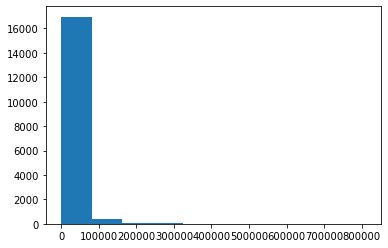

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(train['Value'])

<AxesSubplot:>

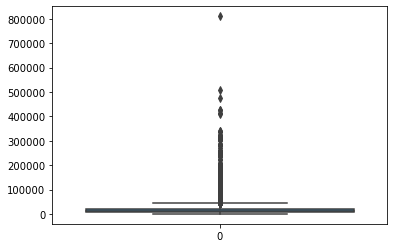

In [149]:
sns.boxplot(data=train["Value"])

In [168]:
train.head()

,Item Code,State,Item Description,ERP Size,Wall / Floor,Sticker Body Type,Item Classification,Value,Item Cat. Code,Quality Code,...,AD7/Sqm,Total AD/Sqm,Billing Rate/Sqm,Buyer Rate/Sqm,Ship+AC0-to City,FY,Category,Review Zone,Category 2,Re Territory
0,391,3,0,438,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
1,394,3,0,439,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
2,396,3,0,447,7,0,1,174096.00,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
3,392,3,0,453,7,0,1,162489.60,4,0,...,0.0,36,403.0,438.0,107,0,0,1,2,22
4,394,4,0,439,7,0,1,97493.76,4,0,...,0.0,36,403.0,438.0,264,0,0,1,2,26


## Building Model

In [150]:
# Seperate Features and Target
X1= train.drop(columns = ['Value'], axis=1)
y1= train['Value']

In [151]:
from sklearn.model_selection import train_test_split,cross_val_score
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X1,y1,test_size=0.2,random_state=22)

In [152]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor,LogisticRegression
# Model Building
features= X1.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

In [153]:
pr= PolynomialFeatures(degree=3)
lm=LinearRegression()
Model_fit=pr.fit_transform(X1)
lm_pr=lm.fit(Model_fit,y1)
y_pred1=lm.predict(Model_fit)

In [154]:
print('R Squared using Polynomial Regression:',r2_score(train['Value'],y_pred1))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(train['Value'],y_pred1))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(train['Value'],y_pred1)))

R Squared using Polynomial Regression: 0.789091324261832
Mean Squared errorusing Polynomial Regerssion: 159772772.3342875
Root mean Squared error using Polynomial Regression: 12640.125487284036


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

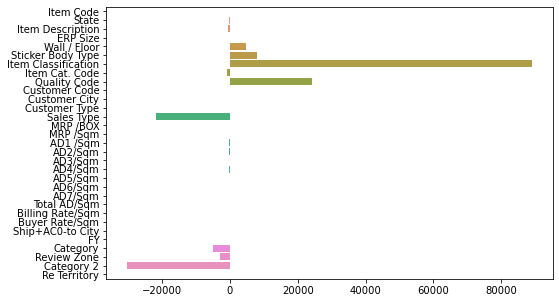

In [155]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

### RMSE

In [156]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 19407.714677930217


In [158]:
algos = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [159]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1500279460209.7686, tolerance: 1092851153.1141806



In [160]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [161]:
evaluation

,Model,RMSE
0,Linear Regression,19407.714678
1,Ridge Regression,19413.964135
2,Lasso Regression,19408.801170
3,K Neighbors Regressor,17262.362314
4,Decision Tree Regressor,17460.492416


In [162]:
mse=mean_squared_error(y_valid,y_pred)
r_sqaured = r2_score(y_valid, y_pred)
rmse=sqrt(mse)
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 304868795.4160988
Root_Mean_Sqaured_Erro: 17460.49241619774
r_sqaure_value: 0.5381897172654464


In [163]:
model = KNeighborsRegressor()
model.fit(X1, y1)
final_predictions = model.predict(test)
final_predictions

array([ 6972.48 ,  6972.48 , 10869.552, ..., 12261.456, 11381.148,
       12261.456])

In [165]:
submission = pd.read_csv('sample.csv')
submission.head(20)

,id,value
0,1,1058
1,2,2742
2,3,2935
3,4,670
4,5,1599
5,6,3084
6,7,3057
7,8,2324
8,9,1596
9,10,2622


In [167]:
submission['value'] = final_predictions

#only positive predictions for the target variable
submission['value'] = submission['value'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)